In [20]:
import os
import glob

import pandas as pd
import numpy as np
import rasterio as rio

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from scipy import stats
#import statannotations
from statannot import add_stat_annotation


In [21]:
def img_to_df(img_path, cols):
    with rio.open(img_path) as src:
        as_array = src.read()
        band_arrs = []
        
        for i in np.arange(src.count):
            band_arr = as_array[i].flatten()
            band_arr = band_arr/10000
            
            band_arrs.append(band_arr)
        
        df = pd.DataFrame(band_arrs,cols).T
        df['Date'] = img_path.split('/')[-1].split('_')[0]
        
        # Optional: drops entries with no severity rating. Comment out if unnecessary.
        no_nans = df.dropna(subset=['total_dis_sev']) 
        
        return no_nans

In [22]:
def add_vis(df):
    df['pri']= (df['green']- df['greenI'])/(df['green']+df['greenI'])
    df['clre'] = (df['nir']/df['rede'])-1
    df['ndre'] = (df['nir'] - df['rede']) / (df['nir'] + df['rede'])
    df['tcari'] = 3 * (( (df['rede'] - df['red']) - 0.2 * (df['rede'] - df['green']) ) * (df['rede'] / df['red']))
    df['ndvi']= (df['nir']-df['red'])/(df['nir']+df['red'])
    df['evi']= 2.5*(df['nir']-df['red'])/(df['nir']+6*df['red']-7.5*df['blue']+1)
    df['savi']= 1.5*(df['nir']-df['red'])/(df['nir']+df['red']+0.5)
    df['sr']= df['nir']/df['red']
    df['msr']= ((df['nir']/df['red'])-1)/(np.sqrt((df['nir']/df['red'])+1))
    df['gri']=df['green']/df['red']
    df['arvi']=(df['nir']-(2*df['red']-df['blue']))/(df['nir']+(2*df['red']-df['blue']))
    df['cblue_blue'] = (df['c_blue']-df['blue'])/(df['c_blue']+df['blue'])
    df['greenI_cblue'] = (df['greenI']-df['c_blue'])/(df['c_blue']+df['greenI'])
    df['green_cblue'] = (df['green']-df['c_blue'])/(df['c_blue']+df['green'])
    df['yellow_cblue'] = (df['yellow']-df['c_blue'])/(df['c_blue']+df['yellow'])
    df['cblue_red'] = (df['c_blue']-df['red'])/(df['c_blue']+df['red'])
    df['rede_cblue'] = (df['rede']-df['c_blue'])/(df['c_blue']+df['rede'])
    df['nir_cblue'] = (df['nir']-df['c_blue'])/(df['c_blue']+df['nir'])
    df['greenI_blue'] = (df['greenI']-df['blue'])/(df['blue']+df['greenI'])
    df['green_blue'] = (df['green']-df['blue'])/(df['blue']+df['green'])
    df['yellow_blue'] = (df['yellow']-df['blue'])/(df['blue']+df['yellow'])
    df['blue_red'] = (df['blue']-df['red'])/(df['blue']+df['red'])
    df['rede_blue'] = (df['rede']-df['blue'])/(df['blue']+df['rede'])
    df['nir_blue'] = (df['nir']-df['blue'])/(df['nir']+df['blue'])
    df['greenI_yellow'] = (df['greenI']-df['yellow'])/(df['greenI']+df['yellow'])
    df['greenI_red'] = (df['greenI']-df['red'])/(df['greenI']+df['red'])
    df['rede_greenI'] = (df['rede']-df['greenI'])/(df['greenI']+df['rede'])
    df['nir_greenI'] = (df['nir']-df['greenI'])/(df['greenI']+df['nir'])
    df['green_yellow'] = (df['green']-df['yellow'])/(df['green']+df['yellow'])
    df['green_red'] = (df['green']-df['red'])/(df['green']+df['red'])
    df['rede_green'] = (df['rede']-df['green'])/(df['green']+df['rede'])
    df['nir_green'] = (df['nir']-df['green'])/(df['green']+df['nir'])
    df['yellow_red'] = (df['yellow']-df['red'])/(df['yellow']+df['red'])
    df['rede_yellow'] = (df['rede']-df['yellow'])/(df['yellow']+df['rede'])
    df['nir_yellow'] = (df['nir']-df['yellow'])/(df['yellow']+df['nir'])
    df['rede_red']= (df['rede']-df['red'])/(df['rede']+df['red'])


    
    return df

In [23]:
dis_ras_20 = glob.glob('../data/images/2020/PScope/dis_band_*/*.tif')
dis_ras_21 = glob.glob('../data/images/2021/PScope/dis_band_*/*.tif')
dis_ras_22 = glob.glob('../data/images/2022/PScope/dis_band_*/*.tif')

In [24]:
dis_ras_22[0].split('/')[-1].split('_')[0]

'20220726'

In [26]:
cols = ['c_blue','blue','greenI', 'green', 'yellow', 'red', 'rede', 'nir','total_dis_sev','dm_sev', 'dm_inc']

# Get a dataframe for all 2020 images

dfs_2020 = [img_to_df(dis_ras_20[i], cols) for i in np.arange(len(dis_ras_20))]
df_2020 = pd.concat(dfs_2020)

df_2020['total_dis_sev'] = df_2020['total_dis_sev']*10000
df_2020['dm_sev'] = df_2020['dm_sev']*10000
df_2020['dm_inc'] = df_2020['dm_inc']*10000

df_2020['inc_class'] = 'low'
df_2020.loc[df_2020['dm_inc']>25,'inc_class']= 'high'
    
df_2020['severity_class'] = 'low'
df_2020.loc[df_2020['dm_sev']>10,'severity_class']= 'high'

vis_2020 = add_vis(df_2020)

vis_2020.columns

Index(['c_blue', 'blue', 'greenI', 'green', 'yellow', 'red', 'rede', 'nir',
       'total_dis_sev', 'dm_sev', 'dm_inc', 'Date', 'inc_class',
       'severity_class', 'pri', 'clre', 'ndre', 'tcari', 'ndvi', 'evi', 'savi',
       'sr', 'msr', 'gri', 'arvi', 'cblue_blue', 'greenI_cblue', 'green_cblue',
       'yellow_cblue', 'cblue_red', 'rede_cblue', 'nir_cblue', 'greenI_blue',
       'green_blue', 'yellow_blue', 'blue_red', 'rede_blue', 'nir_blue',
       'greenI_yellow', 'greenI_red', 'rede_greenI', 'nir_greenI',
       'green_yellow', 'green_red', 'rede_green', 'nir_green', 'yellow_red',
       'rede_yellow', 'nir_yellow', 'rede_red'],
      dtype='object')

In [27]:
vis_2020.Date.unique()

array(['20200801', '20200713', '20200616'], dtype=object)

In [29]:
# Get df for 2021 and 2022

#2021

dfs_2021 = [img_to_df(dis_ras_21[i], cols) for i in np.arange(len(dis_ras_21))]
df_2021 = pd.concat(dfs_2021)

df_2021['total_dis_sev'] = df_2021['total_dis_sev']*10000
df_2021['dm_sev'] = df_2021['dm_sev']*10000
df_2021['dm_inc'] = df_2021['dm_inc']*10000

df_2021['inc_class'] = 'low'
df_2021.loc[df_2021['dm_inc']>25,'inc_class']= 'high'
    
df_2021['severity_class'] = 'low'
df_2021.loc[df_2021['dm_sev']>10,'severity_class']= 'high'

vis_2021 = add_vis(df_2021)
#vis_2021.columns

dfs_2022 = [img_to_df(dis_ras_22[i], cols) for i in np.arange(len(dis_ras_22))]
df_2022 = pd.concat(dfs_2022)

df_2022['total_dis_sev'] = df_2022['total_dis_sev']*10000
df_2022['dm_sev'] = df_2022['dm_sev']*10000
df_2022['dm_inc'] = df_2022['dm_inc']*10000

df_2022['inc_class'] = 'low'
df_2022.loc[df_2022['dm_inc']>25,'inc_class']= 'high'
    
df_2022['severity_class'] = 'low'
df_2022.loc[df_2022['dm_sev']>10,'severity_class']= 'high'

vis_2022 = add_vis(df_2022)

print(vis_2022.Date.unique())
print(vis_2021.Date.unique())

['20220726' '20220801' '20220630' '20220704' '20220624']
['20210808' '20210804' '20210726' '20210715']


In [30]:
dfs = [vis_2020, vis_2021, vis_2022]

In [31]:
for df in dfs:
    
    df.loc[df['ndvi']<=0.65,'ndvi_group']= '<0.65'
    df.loc[(df['ndvi']> 0.65)&(df['ndvi']<=0.7),'ndvi_group']='0.66-0.70'
    df.loc[(df['ndvi']> 0.7)&(df['ndvi']<=0.75),'ndvi_group']='0.71-0.75'
    df.loc[(df['ndvi']> 0.75)&(df['ndvi']<=0.8),'ndvi_group']='0.76-0.80'
    df.loc[(df['ndvi']> 0.8)&(df['ndvi']<=0.85),'ndvi_group']='0.81-0.85'
    df.loc[(df['ndvi']> 0.85),'ndvi_group']='>0.85'


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.060e-01 U_stat=3.970e+02
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.596e+03


/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/statannot/statannot.py:337: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = box_plotter.plot_hues[index] == hue_level


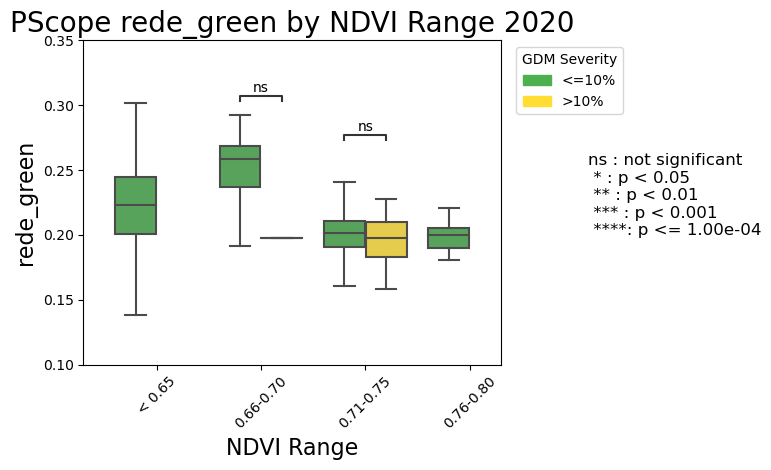

In [77]:
#Severity 2020 RedEgreen
x = "ndvi_group"
y = "rede_green"
hue = "severity_class"
hue_order=['low', 'high']
order = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85', '>0.85']
pairs=[
#     ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
#     ((order[3], "high"), (order[3], "low")),
#     ((order[4], "high"), (order[4], "low")),
#     ((order[5], "high"), (order[5], "low"))
    ]


colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=vis_2020, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['< 0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85','>0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=vis_2020, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=16)
plt.ylabel("rede_green", fontsize= 16)

plt.ylim(0.1, 0.35)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
high_patch = mpatches.Patch(color='#FFDD33', label='>10%')

plt.legend(title='GDM Severity',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
plt.title("PScope rede_green by NDVI Range 2020", fontsize=20)

plt.tight_layout()
# plt.savefig("ICPP_pscopeREGR_2020.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.780e-02 U_stat=9.000e+00
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.529e-01 U_stat=2.646e+03


/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/statannot/statannot.py:337: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = box_plotter.plot_hues[index] == hue_level


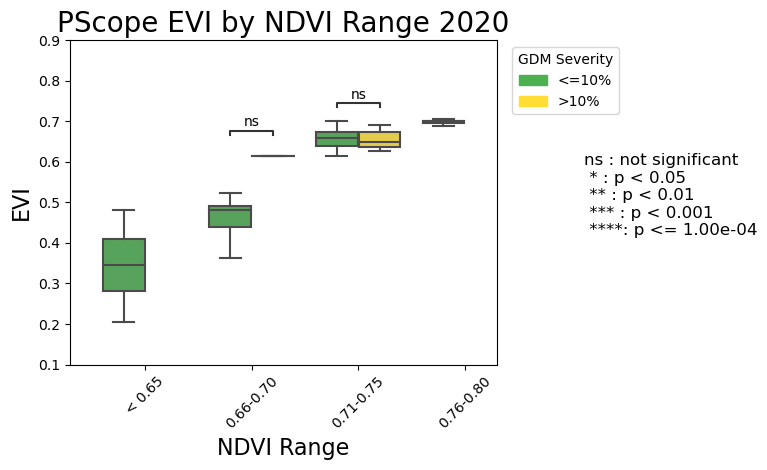

In [76]:
#Severity 2020
x = "ndvi_group"
y = "evi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85', '>0.85']
pairs=[
#     ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
#     ((order[3], "high"), (order[3], "low")),
#     ((order[4], "high"), (order[4], "low")),
#     ((order[5], "high"), (order[5], "low"))
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=vis_2020, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['< 0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85','>0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=vis_2020, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.1, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
high_patch = mpatches.Patch(color='#FFDD33', label='>10%')

plt.legend(title='GDM Severity',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
plt.title("PScope EVI by NDVI Range 2020", fontsize=20)

plt.tight_layout()
# plt.savefig("ICPP_pscopeEVI_sev_2020.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.583e-13 U_stat=8.316e+03
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=7.678e+03
0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.000e+00


/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/statannot/statannot.py:337: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = box_plotter.plot_hues[index] == hue_level


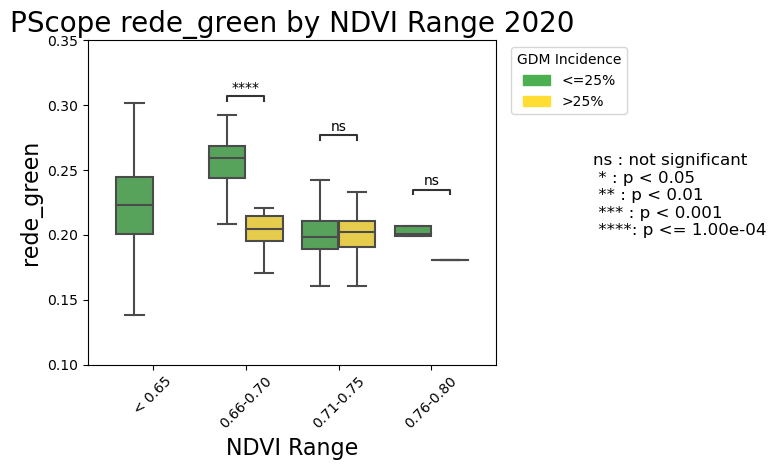

In [78]:
#Incidence 2020 - redegreen

x = "ndvi_group"
y = "rede_green"
hue = "inc_class"
hue_order=['low', 'high']
order = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85', '>0.85']
pairs=[
#     ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
#     ((order[4], "high"), (order[4], "low")),
    #((order[5], "high"), (order[5], "low"))
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=vis_2020, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['< 0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85','>0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=vis_2020, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=16)
plt.ylabel("rede_green", fontsize= 16)

plt.ylim(0.1, 0.35)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=25%')
high_patch = mpatches.Patch(color='#FFDD33', label='>25%')

plt.legend(title='GDM Incidence',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
plt.title("PScope rede_green by NDVI Range 2020", fontsize=20)

plt.tight_layout()
# plt.savefig("ICPP_pscopeREGR_inc_2020.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.520e-14 U_stat=3.600e+01
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.775e-02 U_stat=9.414e+03
0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.000e+00


/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/statannot/statannot.py:337: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = box_plotter.plot_hues[index] == hue_level


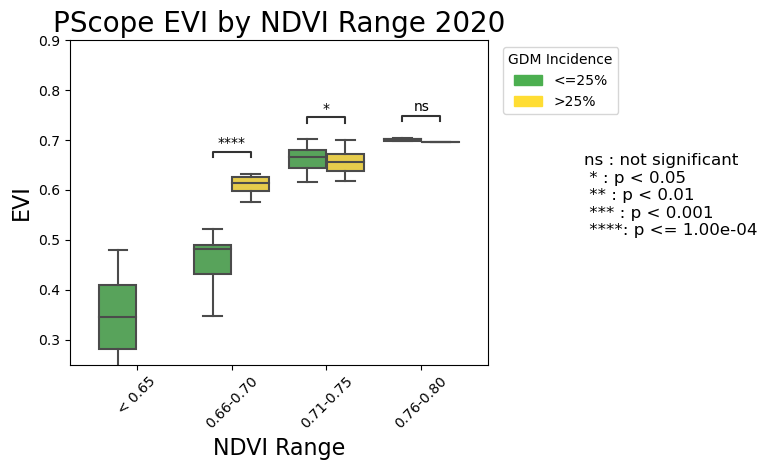

In [74]:
#Incidence 2020

x = "ndvi_group"
y = "evi"
hue = "inc_class"
hue_order=['low', 'high']
order = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85', '>0.85']
pairs=[
#     ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
#     ((order[4], "high"), (order[4], "low")),
    #((order[5], "high"), (order[5], "low"))
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=vis_2020, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['< 0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85','>0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=vis_2020, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.25, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=25%')
high_patch = mpatches.Patch(color='#FFDD33', label='>25%')

plt.legend(title='GDM Incidence',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
plt.title("PScope EVI by NDVI Range 2020", fontsize=20)

plt.tight_layout()
# plt.savefig("ICPP_pscopeEVI_inc_2020.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.358e+04
<0.65_low v.s. <0.65_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.246e-01 U_stat=9.700e+01
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.511e-03 U_stat=6.792e+04
0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.951e-01 U_stat=1.707e+03


/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/statannot/statannot.py:337: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = box_plotter.plot_hues[index] == hue_level


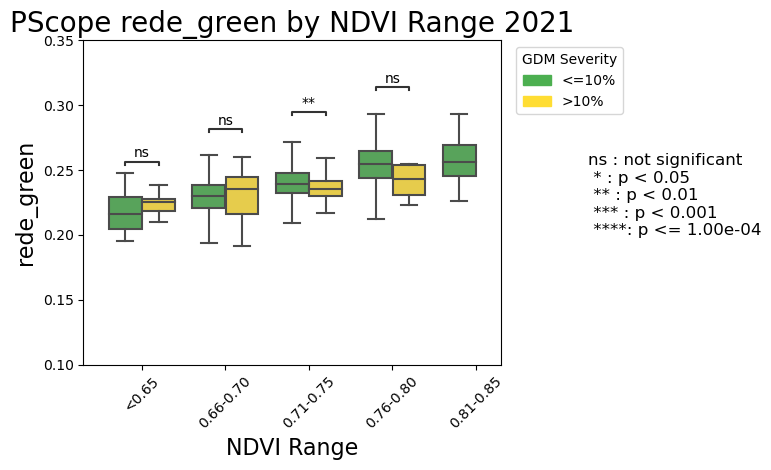

In [73]:
#Severity 2021 - redegreen

x = "ndvi_group"
y = "rede_green"
hue = "severity_class"
hue_order=['low', 'high']
order = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85','> 0.85']
pairs=[
     ((order[0], "high"), (order[0], "low")),
     ((order[1], "high"), (order[1], "low")),
      ((order[2], "high"), (order[2], "low")),
     ((order[3], "high"), (order[3], "low")),
#      ((order[4], "high"), (order[4], "low")),

    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=vis_2021, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85','> 0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=vis_2021, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=16)
plt.ylabel("rede_green", fontsize= 16)

plt.ylim(0.1, 0.35)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
high_patch = mpatches.Patch(color='#FFDD33', label='>10%')

plt.legend(title='GDM Severity',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
plt.title("PScope rede_green by NDVI Range 2021", fontsize=20)

plt.tight_layout()
# plt.savefig("ICPP_pscopeREGR_sev_21.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.497e+04
<0.65_low v.s. <0.65_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.180e+02
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.112e-05 U_stat=4.176e+04


/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/statannot/statannot.py:337: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = box_plotter.plot_hues[index] == hue_level


0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.124e-01 U_stat=1.914e+03


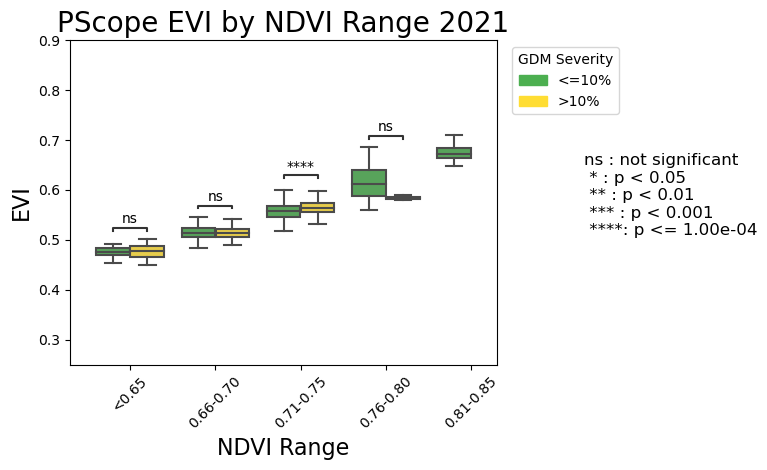

In [72]:
#Severity 2021

x = "ndvi_group"
y = "evi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85','> 0.85']
pairs=[
     ((order[0], "high"), (order[0], "low")),
     ((order[1], "high"), (order[1], "low")),
      ((order[2], "high"), (order[2], "low")),
     ((order[3], "high"), (order[3], "low")),
#      ((order[4], "high"), (order[4], "low")),

    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=vis_2021, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85','> 0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=vis_2021, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.25, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
high_patch = mpatches.Patch(color='#FFDD33', label='>10%')

plt.legend(title='GDM Severity',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
plt.title("PScope EVI by NDVI Range 2021", fontsize=20)

plt.tight_layout()
# plt.savefig("ICPP_pscopeEVI_sev_21.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.064e-01 U_stat=4.198e+03
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.824e-01 U_stat=1.602e+05
0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.317e-02 U_stat=3.071e+03


/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/statannot/statannot.py:337: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = box_plotter.plot_hues[index] == hue_level


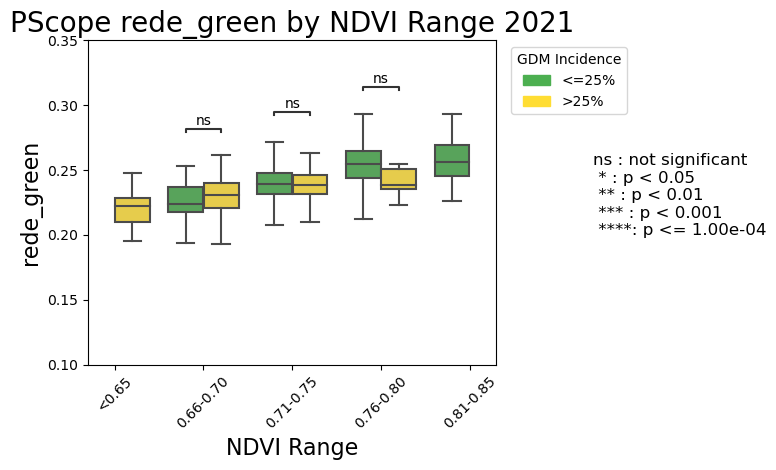

In [70]:
#Incidence 2021 - rede_green

x = "ndvi_group"
y = "rede_green"
hue = "inc_class"
hue_order=['low', 'high']
order = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85','> 0.85']
pairs=[
#      ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
     ((order[2], "high"), (order[2], "low")),
     ((order[3], "high"), (order[3], "low")),
#      ((order[4], "high"), (order[4], "low")),

    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=vis_2021, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85','> 0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=vis_2021, x=x, y=y, order=order, hue=hue,hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=16)
plt.ylabel("rede_green", fontsize= 16)

plt.ylim(0.1, 0.35)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=25%')
high_patch = mpatches.Patch(color='#FFDD33', label='>25%')

plt.legend(title='GDM Incidence',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
plt.title("PScope rede_green by NDVI Range 2021", fontsize=20)

plt.tight_layout()
# plt.savefig("ICPP_pscopeREGR_inc_21.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.631e-01 U_stat=3.980e+03
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.792e-04 U_stat=1.733e+05


/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/statannot/statannot.py:337: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = box_plotter.plot_hues[index] == hue_level


0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.535e-02 U_stat=3.208e+03


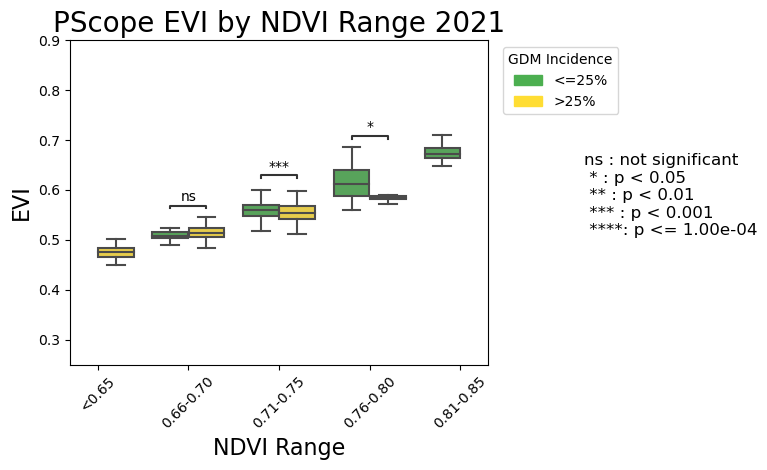

In [71]:
#Incidence 2021

x = "ndvi_group"
y = "evi"
hue = "inc_class"
hue_order=['low', 'high']
order = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85','> 0.85']
pairs=[
#      ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
     ((order[2], "high"), (order[2], "low")),
     ((order[3], "high"), (order[3], "low")),
#      ((order[4], "high"), (order[4], "low")),

    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=vis_2021, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85','> 0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=vis_2021, x=x, y=y, order=order, hue=hue,hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.25, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=25%')
high_patch = mpatches.Patch(color='#FFDD33', label='>25%')

plt.legend(title='GDM Incidence',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
plt.title("PScope EVI by NDVI Range 2021", fontsize=20)

plt.tight_layout()
# plt.savefig("ICPP_pscopeEVI_inc_21.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.129e-01 U_stat=1.044e+04
<0.65_low v.s. <0.65_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.547e-04 U_stat=1.795e+04
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.076e+04
0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.056e+03


/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/statannot/statannot.py:337: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = box_plotter.plot_hues[index] == hue_level


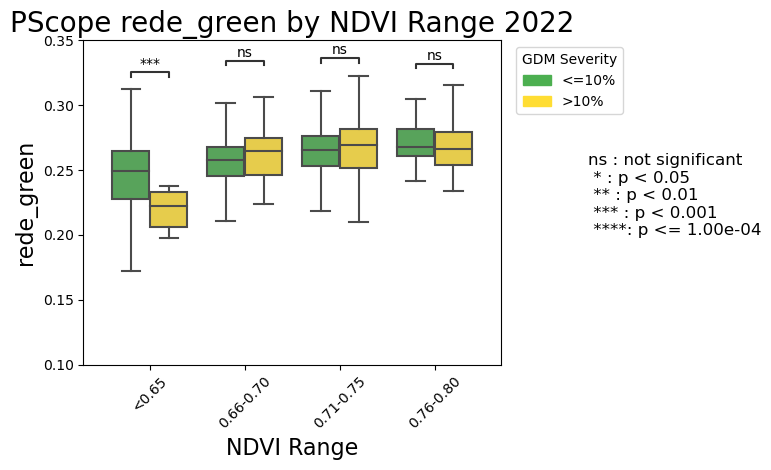

In [67]:
# rede_green
x = "ndvi_group"
y = "rede_green"
hue = "severity_class"
hue_order=['low', 'high']
order = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85', '> 0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
     ((order[2], "high"), (order[2], "low")),
     ((order[3], "high"), (order[3], "low")),
#      ((order[4], "high"), (order[4], "low")),
#     ((order[5], "high"), (order[5], "low"))
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=vis_2022, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85', '> 0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=vis_2022, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=16)
plt.ylabel("rede_green", fontsize= 16)

plt.ylim(0.1, 0.35)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
high_patch = mpatches.Patch(color='#FFDD33', label='>10%')

plt.legend(title='GDM Severity',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
plt.title("PScope rede_green by NDVI Range 2022", fontsize=20)

plt.tight_layout()

# plt.savefig("ICPP_pscopeREGR_sev.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.716e-07 U_stat=5.081e+03
<0.65_low v.s. <0.65_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.109e-01 U_stat=1.354e+04
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.129e-07 U_stat=1.435e+04
0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.865e-01 U_stat=7.520e+02


/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/statannot/statannot.py:337: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = box_plotter.plot_hues[index] == hue_level


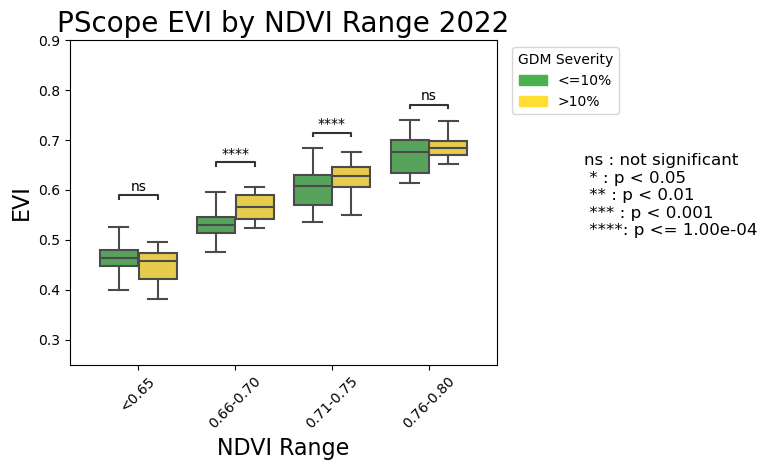

In [66]:
x = "ndvi_group"
y = "evi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85', '> 0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
     ((order[2], "high"), (order[2], "low")),
     ((order[3], "high"), (order[3], "low")),
#      ((order[4], "high"), (order[4], "low")),
#     ((order[5], "high"), (order[5], "low"))
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=vis_2022, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85', '> 0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=vis_2022, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.25, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
high_patch = mpatches.Patch(color='#FFDD33', label='>10%')

plt.legend(title='GDM Severity',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
plt.title("PScope EVI by NDVI Range 2022", fontsize=20)

plt.tight_layout()

# plt.savefig("ICPP_pscopeEVI_sev_22.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.094e-01 U_stat=2.879e+04
<0.65_low v.s. <0.65_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.569e-02 U_stat=2.416e+04
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.943e-01 U_stat=1.946e+04


/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/statannot/statannot.py:337: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = box_plotter.plot_hues[index] == hue_level


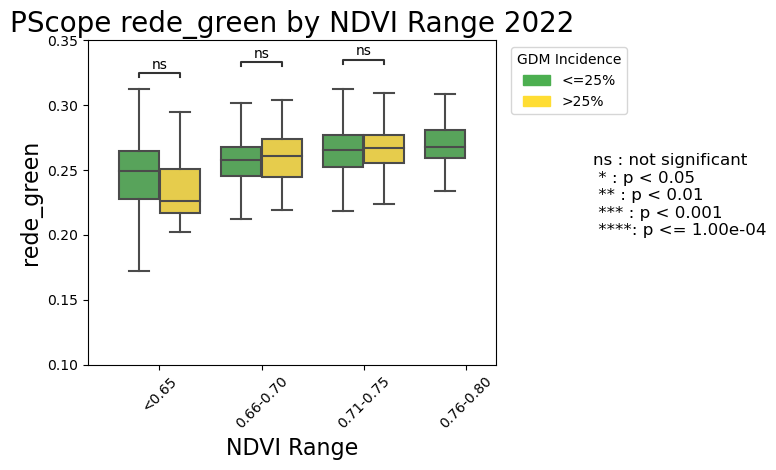

In [65]:
#Incidence 2022
x = "ndvi_group"
y = "rede_green"
hue = "inc_class"
hue_order=['low', 'high']
order = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85', '> 0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
     ((order[2], "high"), (order[2], "low")),
#      ((order[3], "high"), (order[3], "low")),
#     ((order[4], "high"), (order[4], "low")),
#     ((order[5], "high"), (order[5], "low"))
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=vis_2022, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85', '> 0.85'],
                   rotation=45)
add_stat_annotation(ax, data=vis_2022, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=16)
plt.ylabel("rede_green", fontsize= 16)

plt.ylim(0.1, 0.35)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=25%')
high_patch = mpatches.Patch(color='#FFDD33', label='>25%')

plt.legend(title='GDM Incidence',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
plt.title("PScope rede_green by NDVI Range 2022", fontsize=20)

plt.tight_layout()
# plt.savefig("ICPP_pscopeREGR_inc_22.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.604e-14 U_stat=1.595e+04
<0.65_low v.s. <0.65_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.789e-01 U_stat=2.140e+04
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.920e-02 U_stat=1.761e+04


/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/statannot/statannot.py:337: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = box_plotter.plot_hues[index] == hue_level


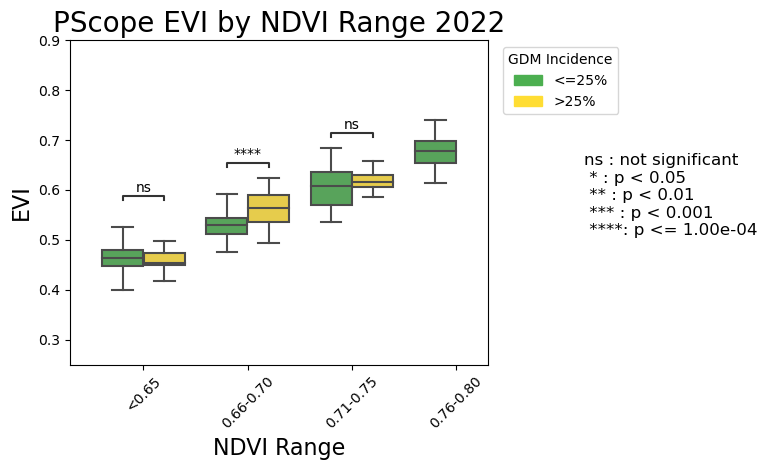

In [64]:
#Incidence 2022
x = "ndvi_group"
y = "evi"
hue = "inc_class"
hue_order=['low', 'high']
order = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85', '> 0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
     ((order[2], "high"), (order[2], "low")),
#      ((order[3], "high"), (order[3], "low")),
#     ((order[4], "high"), (order[4], "low")),
#     ((order[5], "high"), (order[5], "low"))
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=vis_2022, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85', '> 0.85'],
                   rotation=45)
add_stat_annotation(ax, data=vis_2022, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.25, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=25%')
high_patch = mpatches.Patch(color='#FFDD33', label='>25%')

plt.legend(title='GDM Incidence',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
plt.title("PScope EVI by NDVI Range 2022", fontsize=20)

plt.tight_layout()
# plt.savefig("ICPP_pscopeEVI_inc_22.svg")

## EVI by Date


In [80]:
vis_2020.Date.unique()

array(['20200801', '20200713', '20200616'], dtype=object)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

20200801_low v.s. 20200801_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.334e-01 U_stat=3.017e+03


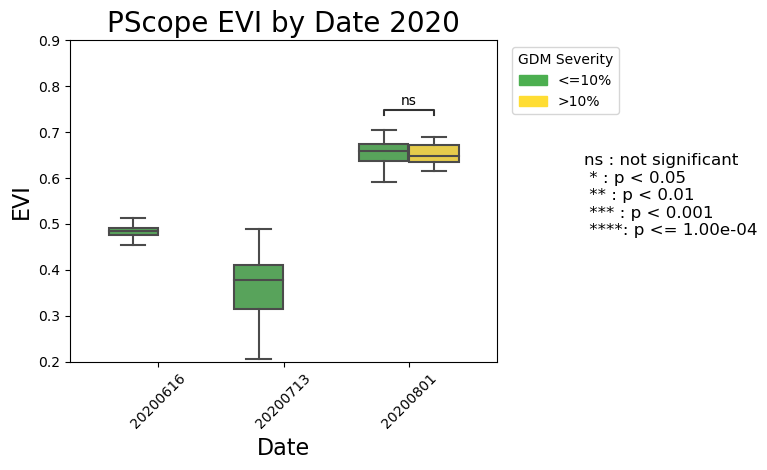

In [118]:
#Severity 2020

x = "Date"
y = "evi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['20200616', '20200713','20200801']
pairs=[
#      ((order[0], "high"), (order[0], "low")),
#     ((order[1], "high"), (order[1], "low")),
     ((order[2], "high"), (order[2], "low")),
#       ((order[3], "high"), (order[3], "low")),
#     ((order[4], "high"), (order[4], "low"))
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=vis_2020, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['20200616', '20200713','20200801'], 
                   rotation=45)
add_stat_annotation(ax, data=vis_2020, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.2, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
high_patch = mpatches.Patch(color='#FFDD33', label='>10%')

plt.legend(title='GDM Severity',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
plt.title("PScope EVI by Date 2020", fontsize=20)

plt.tight_layout()
# plt.savefig("ICPP_PScopesev_2020.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

20200801_low v.s. 20200801_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.530e-07 U_stat=1.216e+04


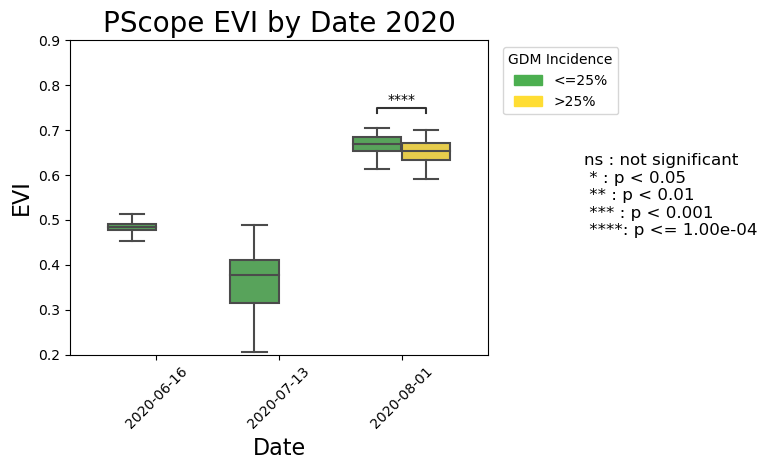

In [119]:
#Inc 2020

x = "Date"
y = "evi"
hue = "inc_class"
hue_order=['low', 'high']
order = ['20200616', '20200713','20200801']
pairs=[
#      ((order[0], "high"), (order[0], "low")),
#      ((order[1], "high"), (order[1], "low")),
     ((order[2], "high"), (order[2], "low")),
#      ((order[3], "high"), (order[3], "low")),
#     ((order[4], "high"), (order[4], "low")),
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=vis_2020, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['2020-06-16', '2020-07-13','2020-08-01'], 
                   rotation=45)
add_stat_annotation(ax, data=vis_2020, x=x, y=y, order=order, hue=hue,hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.2, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=25%')
high_patch = mpatches.Patch(color='#FFDD33', label='>25%')

plt.legend(title='GDM Incidence',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
plt.title("PScope EVI by Date 2020", fontsize=20)

plt.tight_layout()
# plt.savefig("ICPP_PScopeinc_2020.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

20200801_low v.s. 20200801_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.316e-02 U_stat=7.734e+03


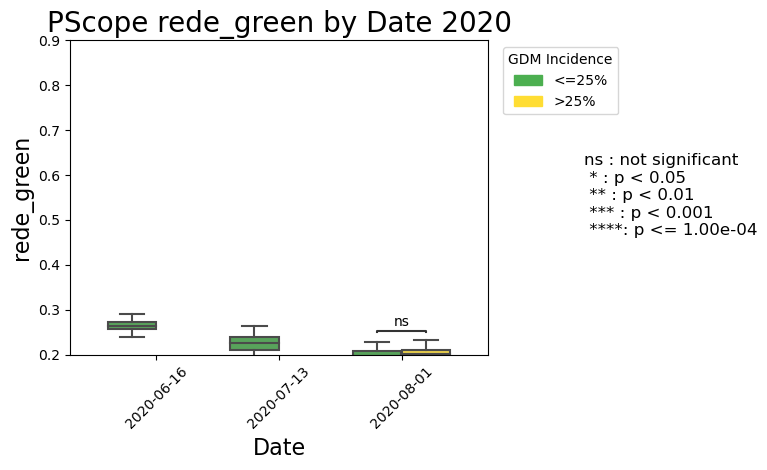

In [130]:
#Inc 2020

x = "Date"
y = "rede_green"
hue = "inc_class"
hue_order=['low', 'high']
order = ['20200616', '20200713','20200801']
pairs=[
#      ((order[0], "high"), (order[0], "low")),
#      ((order[1], "high"), (order[1], "low")),
     ((order[2], "high"), (order[2], "low")),
#      ((order[3], "high"), (order[3], "low")),
#     ((order[4], "high"), (order[4], "low")),
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=vis_2020, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['2020-06-16', '2020-07-13','2020-08-01'], 
                   rotation=45)
add_stat_annotation(ax, data=vis_2020, x=x, y=y, order=order, hue=hue,hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("rede_green", fontsize= 16)

plt.ylim(0.2, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=25%')
high_patch = mpatches.Patch(color='#FFDD33', label='>25%')

plt.legend(title='GDM Incidence',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
plt.title("PScope rede_green by Date 2020", fontsize=20)

plt.tight_layout()
# plt.savefig("ICPP_PScopeinc_2020.svg")

In [89]:
vis_2021.Date.unique()

array(['20210808', '20210804', '20210726', '20210715'], dtype=object)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

20210726_low v.s. 20210726_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.819e-02 U_stat=7.954e+03
20210804_low v.s. 20210804_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.833e-04 U_stat=2.321e+04
20210808_low v.s. 20210808_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.527e-01 U_stat=2.055e+04


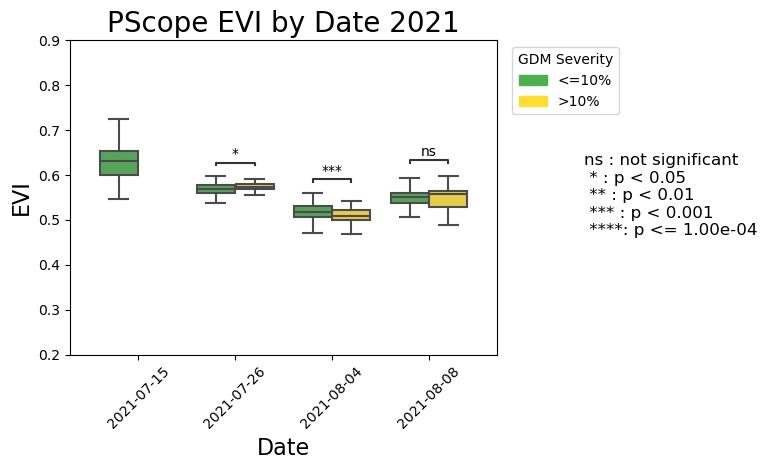

In [120]:
#Severity 2021

x = "Date"
y = "evi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['20210715', '20210726', '20210804', '20210808']
pairs=[
#      ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
#     ((order[4], "high"), (order[4], "low")),

    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=vis_2021, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['2021-07-15', '2021-07-26', '2021-08-04', '2021-08-08'], 
                   rotation=45)
add_stat_annotation(ax, data=vis_2021, x=x, y=y, order=order, hue=hue,hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.2, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
high_patch = mpatches.Patch(color='#FFDD33', label='>10%')

plt.legend(title='GDM Severity',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
plt.title("PScope EVI by Date 2021", fontsize=20)

plt.tight_layout()
# plt.savefig("ICPP_PScopesev_2021.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

20210726_low v.s. 20210726_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.014e-02 U_stat=1.341e+04
20210804_low v.s. 20210804_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.444e-02 U_stat=2.111e+04
20210808_low v.s. 20210808_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.890e-01 U_stat=2.036e+04


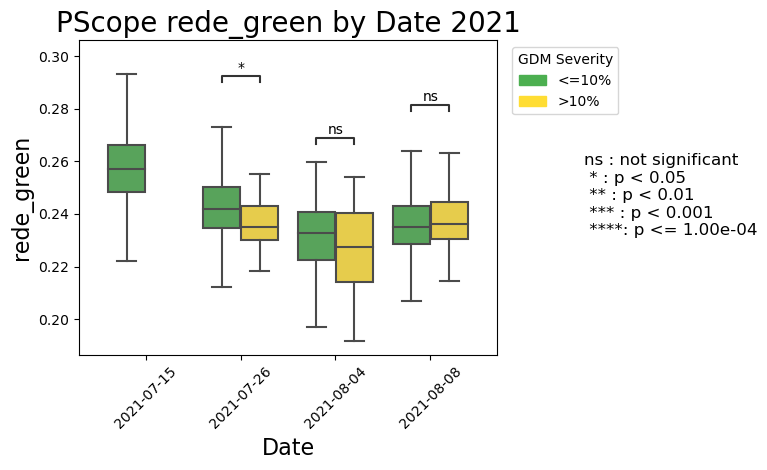

In [129]:
#Severity 2021

x = "Date"
y = "rede_green"
hue = "severity_class"
hue_order=['low', 'high']
order = ['20210715', '20210726', '20210804', '20210808']
pairs=[
#      ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
#     ((order[4], "high"), (order[4], "low")),

    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=vis_2021, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['2021-07-15', '2021-07-26', '2021-08-04', '2021-08-08'], 
                   rotation=45)
add_stat_annotation(ax, data=vis_2021, x=x, y=y, order=order, hue=hue,hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("rede_green", fontsize= 16)

# plt.ylim(0.2, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
high_patch = mpatches.Patch(color='#FFDD33', label='>10%')

plt.legend(title='GDM Severity',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
plt.title("PScope rede_green by Date 2021", fontsize=20)

plt.tight_layout()
# plt.savefig("ICPP_PScopesev_2021.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

20210726_low v.s. 20210726_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.248e+04
20210715_low v.s. 20210715_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.510e+02
20210808_low v.s. 20210808_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.053e-03 U_stat=2.866e+04


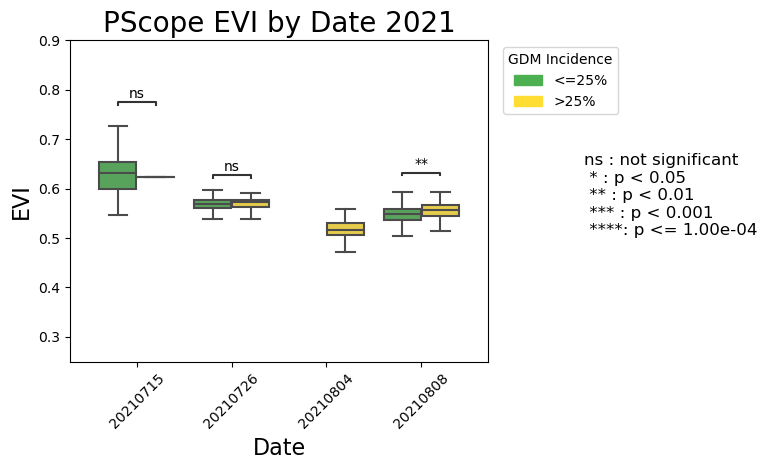

In [121]:
#Inc 2021

x = "Date"
y = "evi"
hue = "inc_class"
hue_order=['low', 'high']
order = ['20210715', '20210726', '20210804', '20210808']
pairs=[
     ((order[0], "high"), (order[0], "low")),
     ((order[1], "high"), (order[1], "low")),
#      ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
#      ((order[4], "high"), (order[4], "low"))
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=vis_2021, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['20210715', '20210726', '20210804', '20210808'], 
                   rotation=45)
add_stat_annotation(ax, data=vis_2021, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.25, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=25%')
high_patch = mpatches.Patch(color='#FFDD33', label='>25%')

plt.legend(title='GDM Incidence',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
plt.title("PScope EVI by Date 2021", fontsize=20)

plt.tight_layout()
# plt.savefig("ICPP_PScopeinc_2021.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

20210726_low v.s. 20210726_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.053e-03 U_stat=2.821e+04
20210715_low v.s. 20210715_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.630e+02
20210808_low v.s. 20210808_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.360e-03 U_stat=2.844e+04


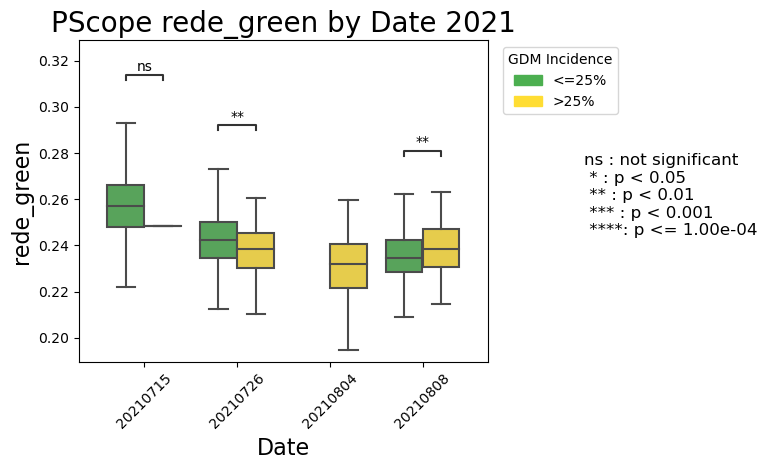

In [127]:
#Inc 2021

x = "Date"
y = "rede_green"
hue = "inc_class"
hue_order=['low', 'high']
order = ['20210715', '20210726', '20210804', '20210808']
pairs=[
     ((order[0], "high"), (order[0], "low")),
     ((order[1], "high"), (order[1], "low")),
#      ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
#      ((order[4], "high"), (order[4], "low"))
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=vis_2021, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['20210715', '20210726', '20210804', '20210808'], 
                   rotation=45)
add_stat_annotation(ax, data=vis_2021, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("rede_green", fontsize= 16)

# plt.ylim(0.25, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=25%')
high_patch = mpatches.Patch(color='#FFDD33', label='>25%')

plt.legend(title='GDM Incidence',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
plt.title("PScope rede_green by Date 2021", fontsize=20)

plt.tight_layout()
# plt.savefig("ICPP_PScopeinc_2021.svg")

In [98]:
vis_2022.Date.unique()

array(['20220726', '20220801', '20220630', '20220704', '20220624'],
      dtype=object)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

20220704_low v.s. 20220704_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.535e+03
20220726_low v.s. 20220726_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.381e+03
20220801_low v.s. 20220801_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.418e-06 U_stat=2.285e+04


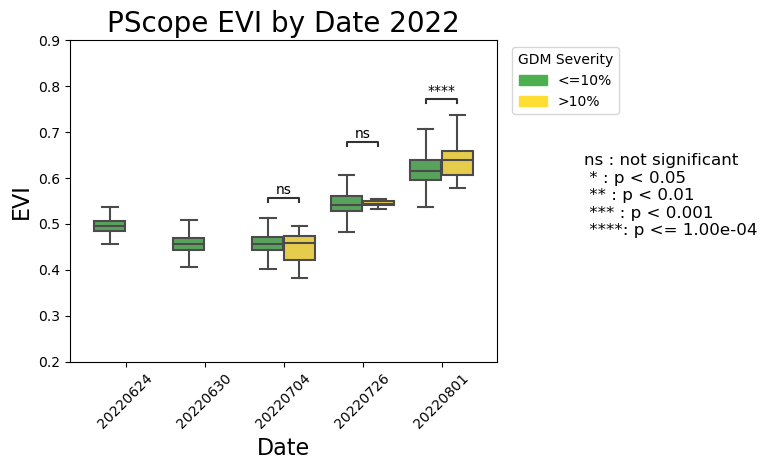

In [122]:
#Severity 2022

x = "Date"
y = "evi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['20220624', '20220630', '20220704', '20220726','20220801']
pairs=[
#      ((order[0], "high"), (order[0], "low")),
#     ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
    ((order[4], "high"), (order[4], "low"))
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=vis_2022, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['20220624', '20220630', '20220704', '20220726','20220801'], 
                   rotation=45)
add_stat_annotation(ax, data=vis_2022, x=x, y=y, order=order, hue=hue,hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.2, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
high_patch = mpatches.Patch(color='#FFDD33', label='>10%')

plt.legend(title='GDM Severity',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
plt.title("PScope EVI by Date 2022", fontsize=20)

plt.tight_layout()
# plt.savefig("ICPP_PScopesev_2022.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

20220704_low v.s. 20220704_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.519e+03
20220726_low v.s. 20220726_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.647e-01 U_stat=7.072e+03
20220801_low v.s. 20220801_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.192e+04


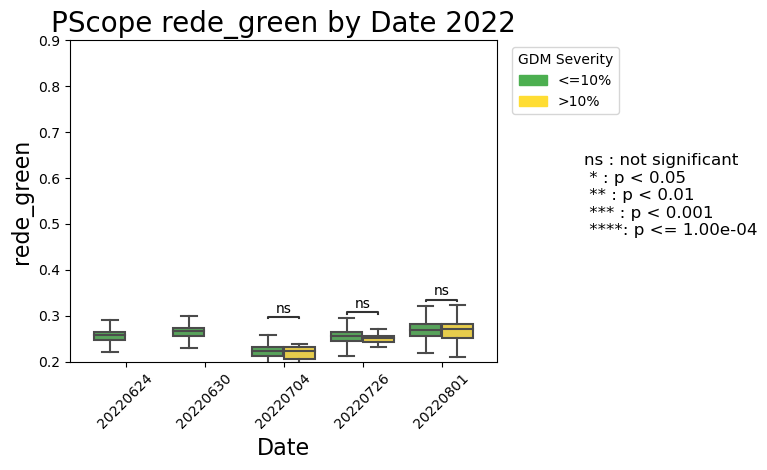

In [125]:
#Severity 2022 - redegreen

x = "Date"
y = "rede_green"
hue = "severity_class"
hue_order=['low', 'high']
order = ['20220624', '20220630', '20220704', '20220726','20220801']
pairs=[
#      ((order[0], "high"), (order[0], "low")),
#     ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
    ((order[4], "high"), (order[4], "low"))
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=vis_2022, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['20220624', '20220630', '20220704', '20220726','20220801'], 
                   rotation=45)
add_stat_annotation(ax, data=vis_2022, x=x, y=y, order=order, hue=hue,hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("rede_green", fontsize= 16)

plt.ylim(0.2, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
high_patch = mpatches.Patch(color='#FFDD33', label='>10%')

plt.legend(title='GDM Severity',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
plt.title("PScope rede_green by Date 2022", fontsize=20)

plt.tight_layout()
# plt.savefig("ICPP_PScopesev_2022.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

20220630_low v.s. 20220630_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.439e-01 U_stat=8.150e+02
20220624_low v.s. 20220624_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=8.300e+02
20220704_low v.s. 20220704_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.288e-01 U_stat=6.006e+03
20220726_low v.s. 20220726_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.638e-03 U_stat=1.613e+04
20220801_low v.s. 20220801_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.249e-07 U_stat=4.137e+04


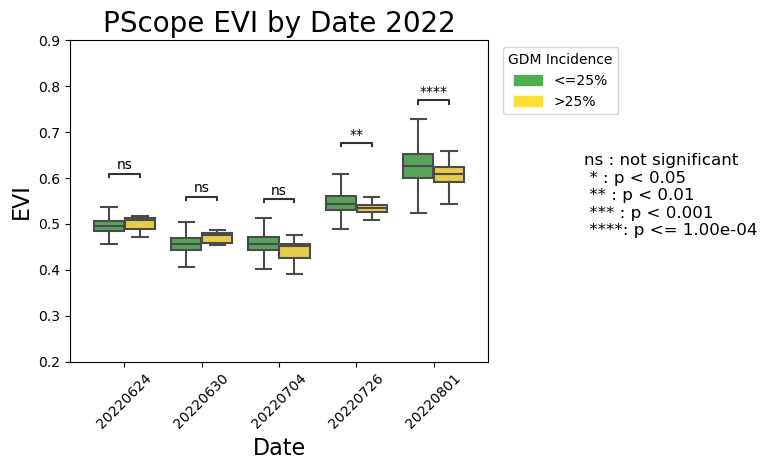

In [123]:
#Inc 2022

x = "Date"
y = "evi"
hue = "inc_class"
hue_order=['low', 'high']
order = ['20220624', '20220630', '20220704', '20220726','20220801']
pairs=[
     ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
    ((order[4], "high"), (order[4], "low"))
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))
#sns.set(font="Tahoma")

ax = sns.boxplot(data=vis_2022, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['20220624', '20220630', '20220704', '20220726','20220801'], 
                   rotation=45)
add_stat_annotation(ax, data=vis_2022, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.2, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=25%')
high_patch = mpatches.Patch(color='#FFDD33', label='>25%')

plt.legend(title='GDM Incidence',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
plt.title("PScope EVI by Date 2022", fontsize=20)

plt.tight_layout()
# plt.savefig("ICPP_PScopeinc_2022.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

20220630_low v.s. 20220630_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.620e-01 U_stat=1.022e+03
20220624_low v.s. 20220624_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.282e-01 U_stat=2.355e+02
20220704_low v.s. 20220704_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.300e+03
20220726_low v.s. 20220726_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.799e-02 U_stat=1.517e+04
20220801_low v.s. 20220801_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.156e+04


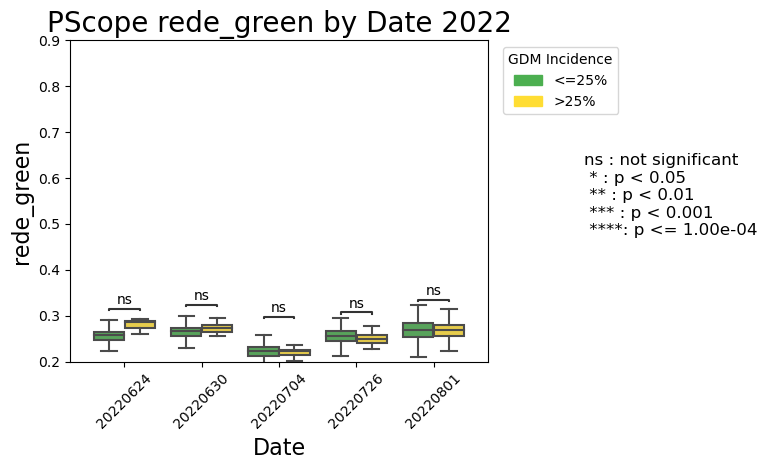

In [124]:
#Inc 2022 -redegreen

x = "Date"
y = "rede_green"
hue = "inc_class"
hue_order=['low', 'high']
order = ['20220624', '20220630', '20220704', '20220726','20220801']
pairs=[
     ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
    ((order[4], "high"), (order[4], "low"))
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))
#sns.set(font="Tahoma")

ax = sns.boxplot(data=vis_2022, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['20220624', '20220630', '20220704', '20220726','20220801'], 
                   rotation=45)
add_stat_annotation(ax, data=vis_2022, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("rede_green", fontsize= 16)

plt.ylim(0.2, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=25%')
high_patch = mpatches.Patch(color='#FFDD33', label='>25%')

plt.legend(title='GDM Incidence',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
plt.title("PScope rede_green by Date 2022", fontsize=20)

plt.tight_layout()
# plt.savefig("ICPP_PScopeinc_2022.svg")

In [60]:
# Check how many weeks of scout data each year

scout_20 = pd.read_csv('../data/scout/scout_2020_gdf.csv')
scout_21 = pd.read_csv('../data/scout/scout_2021_gdf.csv')
scout_22 = pd.read_csv('../data/scout/scout_2022_gdf.csv')


In [61]:
len(scout_20.Date.unique())

11

In [62]:
len(scout_21.Date.unique())

8

In [63]:
len(scout_22.Date.unique())

9

In [69]:
print('First scout date 2020:', scout_20.Date.unique()[0])
print('Last scout date 2020:', scout_20.Date.unique()[10])

First scout date 2020: 2020-06-18
Last scout date 2020: 2020-09-09


In [68]:
print('First scout date 2021:', scout_21.Date.unique()[0])
print('Last scout date 2021:', scout_21.Date.unique()[7])

First scout date 2021: 2021-06-24
Last scout date 2021: 2021-08-17


In [67]:
print('First scout date 2022:', scout_22.Date.unique()[0])
print('Last scout date 2022:', scout_22.Date.unique()[8])

First scout date 2022: 2022-06-22
Last scout date 2022: 2022-08-29
